# Lecure 7.2 Even more data analysis with pandas

Lots more coding today, with a bit of discussion.

Homework is to do some analysis of the movies dataset and present your results on Tuesday

# 1. Warm-up

Learning objectives: modifying plots by looking at the documentation and examples, pandas mastery

For this exercise we are using the durations data TED Talk database from last time

### 1.1 
Create the pandas film_datetime column used previously. Save the resulting pandas dataframe as a new file with a different name. Load this new file into pandas to check that your new column is there.

In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [52]:
ted = pd.read_csv('ted.txt') #read in the file

In [53]:
ted['film_datetime'] = pd.to_datetime(ted.film_date, unit = 's') #create film_datetime column

In [54]:
ted.to_csv(r'C:\Users\emull\OneDrive\Documents\new_ted.csv') #export file to csv

In [55]:
new_ted = pd.read_csv('new_ted.csv') #Read in new file

In [56]:
new_ted.head() # look at df to see if the new column was saved

# yes it was 

,Unnamed: 0,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,film_datetime
0,0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006-02-25 00:00:00
1,1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2006-02-25 00:00:00
2,2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,2006-02-24 00:00:00
3,3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,2006-02-26 00:00:00
4,4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,2006-02-22 00:00:00


### 1.2
Sort the durations data by month and make a histogram of the number of talks in a given month. Note that the default of 10 bins does not work well for this. How well does using 12 bins work?

In [57]:
ted.film_datetime.dt.month.value_counts().sort_index()

1      33
2     601
3     397
4     173
5     123
6     270
7     253
8      30
9     107
10    208
11    232
12    123
Name: film_datetime, dtype: int64

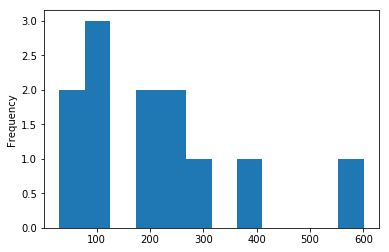

In [58]:
ted.film_datetime.dt.month.value_counts().sort_index().plot(kind = 'hist', bins = 12)
# this really doesn't seem right at all, I should be able to use the months as the bins,
# this gives me a figure showing how many months have 0-50 or 50-100 talks

### 1.3
Look at the documentation for plotting histograms (google it). Define an array that will give the bins you need to make a bin for each month with sensible endpoints, using one of the numpy functions we discussed previously. What should your bin edges be? 

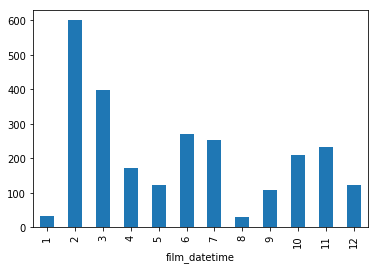

In [59]:
# this is way easier 
ted.groupby(ted.film_datetime.dt.month).film_datetime.count().plot(kind="bar")

In [60]:
month= np.arange(1,13,1)
month

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

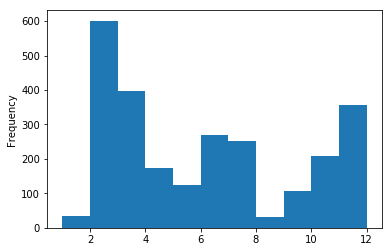

In [61]:
ted.film_datetime.dt.month.sort_index().plot(kind = 'hist', bins = month)

### 1.4
Label your x-axis with month labels 

fig, ax = plt.subplots()
bins = np.arange(1,14)
film = ted.film_datetime.dt.month

ax.hist(film, bins = bins, edgecolor="k", align='left')
ax.set_xticks(bins[:-1])
ax.set_xticklabels([datetime.date(1900,i,1).strftime('%b') for i in bins[:-1]] )

plt.show()

# 2. Discussion

## 2.1 Semiar homework from last week
Some potential questions for discussion:
- What makes a good talk? 
- Does the rubric capture what makes a good talk?
- How were the figures in the talk formatted?
- How was this different than the figures in the paper?

## 2.2 Pandas analysis by students

# 3. Exercises

Learning objectives: pandas mastery, writing data files with pandas, data analysis: asking research questions, doing the analysis, and presenting your results

### 3.1 
From the movies spreadsheet you used last week (Lec 6.2), make a histogram of all the years movies were made, combining the data in three sheets. In one plot, make two subplots, one with bins (bars) of 10 years width, and one with bins of 20 years width. Note this does not mean 10 and 20 bins!


In [63]:
#import the file
excel_file = 'movies.xls'
movies = pd.read_excel(excel_file)
# deal with the separate sheets
movies_sheet1 = pd.read_excel(excel_file, sheet_name = 0, index_col = 0)
movies_sheet1.head()
movies_sheet2 = pd.read_excel(excel_file, sheetname=1, index_col=0)
movies_sheet2.head()
movies_sheet3 = pd.read_excel(excel_file, sheetname=2, index_col=0)
movies_sheet3.head()
movies = pd.concat([movies_sheet1, movies_sheet2, movies_sheet3])
#combine the sheets into one df
xlsx = pd.ExcelFile(excel_file)
movies_sheets = []
for sheet in xlsx.sheet_names:
    movies_sheets.append(xlsx.parse(sheet))
    movies = pd.concat(movies_sheets)

In [84]:
movies.sample(10)

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
889,The Wolverine,2013.0,Action|Adventure|Sci-Fi|Thriller,English,USA,PG-13,138.0,2.35,120000000.0,132550960.0,...,20000.0,992.0,929.0,23755,68000,1.0,328067,533.0,440.0,6.7
1590,The Returned,NaN,Drama|Fantasy|Horror|Mystery,French,France,TV-MA,52.0,16.00,NaN,NaN,...,164.0,116.0,114.0,654,17000,9.0,15762,47.0,23.0,8.3
1752,Step Brothers,2008.0,Comedy,English,USA,R,106.0,2.35,65000000.0,100468793.0,...,8000.0,3000.0,105.0,11264,0,2.0,212499,277.0,173.0,6.9
16,Billy Elliot,2000.0,Drama|Music,English,UK,R,110.0,1.85,5000000.0,21994911.0,...,838.0,203.0,34.0,1122,0,0.0,98354,433.0,151.0,7.7
1541,Limitless,NaN,Crime|Drama|Sci-Fi|Thriller,English,USA,TV-14,42.0,16.00,NaN,NaN,...,766.0,638.0,535.0,2707,11000,2.0,38177,131.0,7.0,7.9
569,2 Fast 2 Furious,2003.0,Action|Crime|Thriller,English,USA,PG-13,107.0,2.35,76000000.0,127083765.0,...,23000.0,787.0,771.0,25296,0,5.0,191912,370.0,150.0,5.9
355,National Lampoon's Vacation,1983.0,Adventure|Comedy,English,USA,R,98.0,1.85,15000000.0,61400000.0,...,816.0,695.0,624.0,3617,0,1.0,71183,183.0,55.0,7.4
705,Baggage Claim,2013.0,Comedy,English,USA,PG-13,96.0,1.85,8500000.0,21564616.0,...,3000.0,1000.0,1000.0,8097,0,9.0,7098,41.0,52.0,5.0
1080,Solitude,2014.0,Comedy|Horror|Mystery|Thriller,English,USA,NaN,89.0,NaN,NaN,NaN,...,138.0,18.0,15.0,192,267,0.0,78,1.0,1.0,6.8
1066,Ride Along,2014.0,Action|Comedy|Crime|Romance,English,USA,PG-13,99.0,2.35,25000000.0,134141530.0,...,655.0,521.0,460.0,2394,0,1.0,75903,109.0,146.0,6.2


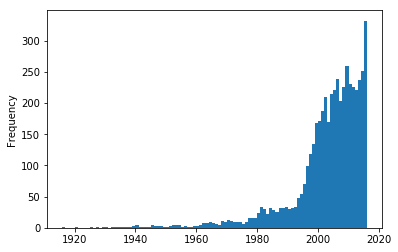

In [68]:
# make historgram of all the years movies were made

movies.Year.plot(kind = 'hist', bins = 100)

In [85]:
#what year was the first movie in the data set released
years = movies.sort_values(["Year"])
years.head()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
0,Intolerance: Love's Struggle Throughout the Ages,1916.0,Drama|History|War,NaN,USA,Not Rated,123.0,1.33,385907.0,NaN,...,436.0,22.0,9.0,481,691,1.0,10718,88.0,69.0,8.0
1,Over the Hill to the Poorhouse,1920.0,Crime|Drama,NaN,USA,NaN,110.0,1.33,100000.0,3000000.0,...,2.0,2.0,0.0,4,0,1.0,5,1.0,1.0,4.8
2,The Big Parade,1925.0,Drama|Romance|War,NaN,USA,Not Rated,151.0,1.33,245000.0,NaN,...,81.0,12.0,6.0,108,226,0.0,4849,45.0,48.0,8.3
3,Metropolis,1927.0,Drama|Sci-Fi,German,Germany,Not Rated,145.0,1.33,6000000.0,26435.0,...,136.0,23.0,18.0,203,12000,1.0,111841,413.0,260.0,8.3
4,Pandora's Box,1929.0,Crime|Drama|Romance,German,Germany,Not Rated,110.0,1.33,NaN,9950.0,...,426.0,20.0,3.0,455,926,1.0,7431,84.0,71.0,8.0


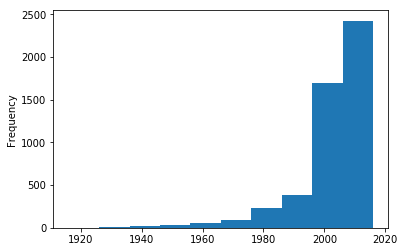

In [95]:
movies.Year.plot(kind = 'hist', bins = np.arange(1916,2020,10)) #can put the array right into the bin = 

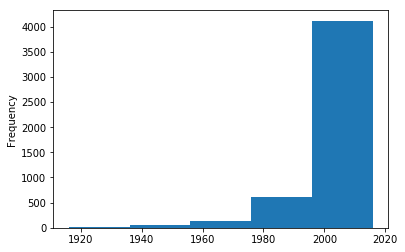

In [96]:
movies.Year.plot(kind = 'hist', bins = np.arange(1916,2020,20)) # change bin size from 10 yrs to 20 yrs

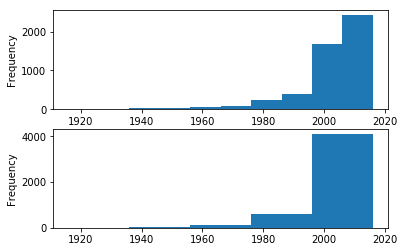

In [111]:
# make the subplots
plt.subplot(2, 1, 1)
movies.Year.plot(kind = 'hist', bins = np.arange(1916,2020,10))
plt.subplot(2, 1, 2)
movies.Year.plot(kind = 'hist', bins = np.arange(1916,2020,20))

### 3.2
Label your axes and change the color of the bars in each plot. Make the bars have black outlines.

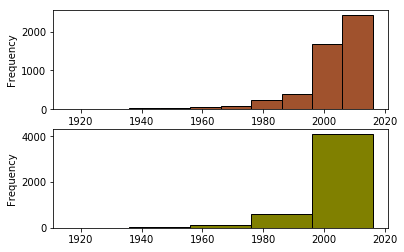

In [119]:
plt.subplot(2, 1, 1)
movies.Year.plot(kind = 'hist', bins = np.arange(1916,2020,10), color = "sienna", edgecolor = "black")
plt.subplot(2, 1, 2)
movies.Year.plot(kind = 'hist', bins = np.arange(1916,2020,20), color = "olive", edgecolor = "black")

### 3.3
Interpret your results. How does changing the number of bins give you a different perspective on the data? Is the dropoff over time an artifact of the dataset or is it realistic?

In [ ]:
# making the bin size smaller makes it easier to see changes in
# the number of movies released per year
#this data does not drop off over time
# there is a drastic increas over time in the number of movies
# made. 
# This makes sense because movies are a newer art medium
# and are now a multi billion dollar industry 


### 3.4 
What is the lowest IMDB score?

In [120]:
movies.head()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
0,Intolerance: Love's Struggle Throughout the Ages,1916.0,Drama|History|War,NaN,USA,Not Rated,123.0,1.33,385907.0,NaN,...,436.0,22.0,9.0,481,691,1.0,10718,88.0,69.0,8.0
1,Over the Hill to the Poorhouse,1920.0,Crime|Drama,NaN,USA,NaN,110.0,1.33,100000.0,3000000.0,...,2.0,2.0,0.0,4,0,1.0,5,1.0,1.0,4.8
2,The Big Parade,1925.0,Drama|Romance|War,NaN,USA,Not Rated,151.0,1.33,245000.0,NaN,...,81.0,12.0,6.0,108,226,0.0,4849,45.0,48.0,8.3
3,Metropolis,1927.0,Drama|Sci-Fi,German,Germany,Not Rated,145.0,1.33,6000000.0,26435.0,...,136.0,23.0,18.0,203,12000,1.0,111841,413.0,260.0,8.3
4,Pandora's Box,1929.0,Crime|Drama|Romance,German,Germany,Not Rated,110.0,1.33,NaN,9950.0,...,426.0,20.0,3.0,455,926,1.0,7431,84.0,71.0,8.0


In [125]:
IMDB = movies['IMDB Score']
IMDB.min() # lowest score

1.6

### 3.5 
Find the names of all the movies with an IMDB score below 5, put these in a new pandas dataframe along with their IMDB scores. Write this dataframe to a new file. Check that your file works by loading it back in again.

In [145]:
Titles = movies[IMDB <5] # make a dataframe that contains only info on movies with IMDB scores less than 5
Titles.head()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
1,Over the Hill to the Poorhouse,1920.0,Crime|Drama,NaN,USA,NaN,110.0,1.33,100000.0,3000000.0,...,2.0,2.0,0.0,4,0,1.0,5,1.0,1.0,4.8
86,The Brain That Wouldn't Die,1962.0,Horror|Sci-Fi,English,USA,Approved,70.0,1.66,62000.0,NaN,...,24.0,16.0,6.0,52,1000,1.0,4752,152.0,95.0,4.1
144,The Stewardesses,1969.0,Comedy|Drama,English,USA,X,93.0,1.37,100000.0,NaN,...,12.0,12.0,0.0,24,17,0.0,161,5.0,21.0,4.0
219,Exorcist II: The Heretic,1977.0,Horror,English,USA,R,118.0,1.85,14000000.0,NaN,...,931.0,726.0,467.0,2704,889,7.0,16294,252.0,82.0,3.7
229,Alien Zone,1978.0,Horror,English,USA,PG,79.0,NaN,350000.0,NaN,...,246.0,29.0,23.0,345,44,0.0,440,21.0,8.0,4.1


In [144]:
less5 = Titles[['Title', 'IMDB Score']] #make a data frame with only the variables you want 
less5.head()

,Title,IMDB Score
1,Over the Hill to the Poorhouse,4.8
86,The Brain That Wouldn't Die,4.1
144,The Stewardesses,4.0
219,Exorcist II: The Heretic,3.7
229,Alien Zone,4.1


In [146]:
less5.to_csv(r'C:\Users\emull\OneDrive\Documents\IMDB_below_5.csv') #export file to csv

In [147]:
IMDB_below_5 = pd.read_csv('IMDB_below_5.csv') #Read in new file

In [149]:
IMDB_below_5.head() # check to see that the new file there

,Unnamed: 0,Title,IMDB Score
0,1,Over the Hill to the Poorhouse,4.8
1,86,The Brain That Wouldn't Die,4.1
2,144,The Stewardesses,4.0
3,219,Exorcist II: The Heretic,3.7
4,229,Alien Zone,4.1


### 3.6-9 (and homework)

Now get creative. Define three research questions for this movies data set and do analysis to answer those quesitons. You will present this analysis, along with your data analysis methods, to the class on Tuesday. Showing this analysis in a notebook is fine, but make sure your plots are formatted for presentation.

In [181]:
# my question, do the reviews of the critics correlate with those of the viewers?
# how about the reviews of the viewers with the FB likes of Actor 1

In [150]:
movies.head()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
0,Intolerance: Love's Struggle Throughout the Ages,1916.0,Drama|History|War,NaN,USA,Not Rated,123.0,1.33,385907.0,NaN,...,436.0,22.0,9.0,481,691,1.0,10718,88.0,69.0,8.0
1,Over the Hill to the Poorhouse,1920.0,Crime|Drama,NaN,USA,NaN,110.0,1.33,100000.0,3000000.0,...,2.0,2.0,0.0,4,0,1.0,5,1.0,1.0,4.8
2,The Big Parade,1925.0,Drama|Romance|War,NaN,USA,Not Rated,151.0,1.33,245000.0,NaN,...,81.0,12.0,6.0,108,226,0.0,4849,45.0,48.0,8.3
3,Metropolis,1927.0,Drama|Sci-Fi,German,Germany,Not Rated,145.0,1.33,6000000.0,26435.0,...,136.0,23.0,18.0,203,12000,1.0,111841,413.0,260.0,8.3
4,Pandora's Box,1929.0,Crime|Drama|Romance,German,Germany,Not Rated,110.0,1.33,NaN,9950.0,...,426.0,20.0,3.0,455,926,1.0,7431,84.0,71.0,8.0


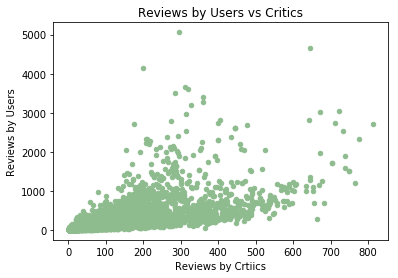

In [176]:
movies.plot('Reviews by Crtiics', 'Reviews by Users', kind = 'scatter', title = 'Reviews by Users vs Critics', color = 'darkseagreen')

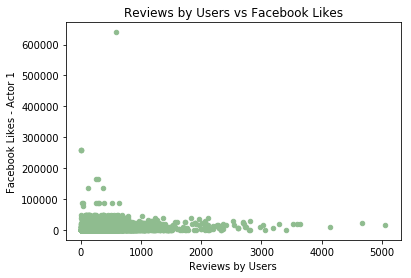

In [187]:
movies.plot('Reviews by Users', 'Facebook Likes - Actor 1', kind = 'scatter', title = 'Reviews by Users vs Facebook Likes', color = 'darkseagreen')

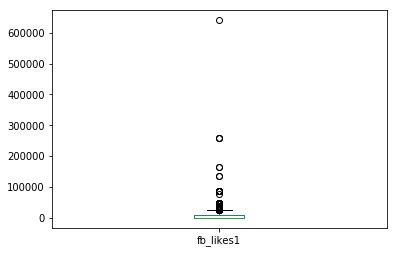

In [194]:
#makeing boxplot to find outliers
movies['fb_likes1'] = movies['Facebook Likes - Actor 1']
movies.fb_likes1.plot(kind ='box')

In [211]:
#removing some of the ouliers to see where the rest of them are
likes = movies['Facebook Likes - Actor 1']
Likes = movies[likes < 50000]


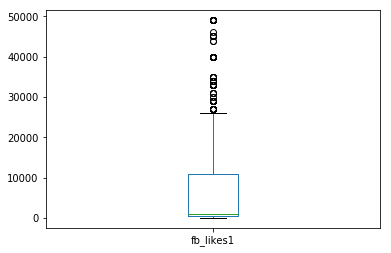

In [212]:
Likes.fb_likes1.plot(kind ='box')

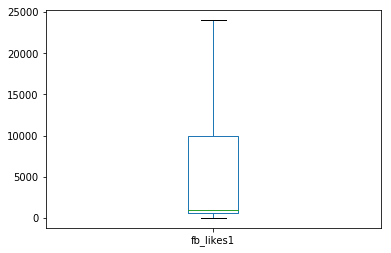

In [216]:
#getting closer
Likes2 = movies[likes < 25000]
Likes2.fb_likes1.plot(kind ='box')
#25000 is the value without outliers!

In [217]:
Likes2.head()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score,fb_likes1
0,Intolerance: Love's Struggle Throughout the Ages,1916.0,Drama|History|War,NaN,USA,Not Rated,123.0,1.33,385907.0,NaN,...,22.0,9.0,481,691,1.0,10718,88.0,69.0,8.0,436.0
1,Over the Hill to the Poorhouse,1920.0,Crime|Drama,NaN,USA,NaN,110.0,1.33,100000.0,3000000.0,...,2.0,0.0,4,0,1.0,5,1.0,1.0,4.8,2.0
2,The Big Parade,1925.0,Drama|Romance|War,NaN,USA,Not Rated,151.0,1.33,245000.0,NaN,...,12.0,6.0,108,226,0.0,4849,45.0,48.0,8.3,81.0
3,Metropolis,1927.0,Drama|Sci-Fi,German,Germany,Not Rated,145.0,1.33,6000000.0,26435.0,...,23.0,18.0,203,12000,1.0,111841,413.0,260.0,8.3,136.0
4,Pandora's Box,1929.0,Crime|Drama|Romance,German,Germany,Not Rated,110.0,1.33,NaN,9950.0,...,20.0,3.0,455,926,1.0,7431,84.0,71.0,8.0,426.0


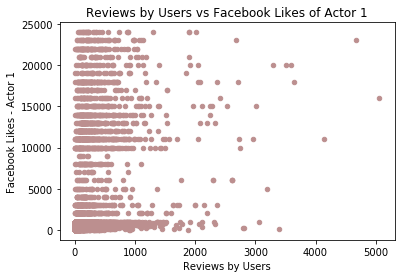

In [221]:
Likes2.plot('Reviews by Users', 'Facebook Likes - Actor 1', kind = 'scatter', title = 'Reviews by Users vs Facebook Likes of Actor 1', color = 'rosybrown')

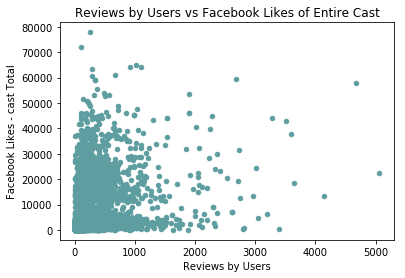

In [223]:
#how about with the cast as a total using the filtered data
Likes2.plot('Reviews by Users', 'Facebook Likes - cast Total', kind = 'scatter', title = 'Reviews by Users vs Facebook Likes of Entire Cast', color = 'cadetblue')